In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [39]:
data = pd.DataFrame(pd.read_csv("african_crises.csv"))

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Make a copy of the original data
data_copy = data.copy()

# Divide the data into “attributes” X and “labels” Y
X = data_copy[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
               'sovereign_external_debt_default', 'gdp_weighted_default',
               'inflation_annual_cpi', 'independence', 'currency_crises',
               'inflation_crises']]
Y = data_copy['banking_crisis']

## percentage of crisis & no crisis
count_no_crisis = len(data_copy[Y == 'no_crisis'])
count_crisis = len(data_copy[Y == 'crisis'])
pct_of_no_crisis = count_no_crisis / (count_no_crisis + count_crisis)
print("percentage of no crisis is", pct_of_no_crisis * 100)
pct_of_crisis = count_crisis / (count_no_crisis + count_crisis)
print("percentage of crisis", pct_of_crisis * 100)



percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


In [41]:
# Convert Y to one-hot encoding
Y = pd.get_dummies(Y)
Y = Y.drop(['no_crisis'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# Convert the oversampled data to DataFrames
X_train_resampled = pd.DataFrame(data=X_train_resampled, columns=X.columns)
y_train_resampled = pd.DataFrame(data=y_train_resampled, columns=Y.columns)


# Print information about the oversampled data
print("Length of oversampled data:", len(X_train_resampled))
print("Number of crisis instances in oversampled data:", len(y_train_resampled[y_train_resampled['crisis'] == 1]))
print("Number of no crisis instances in oversampled data:", len(y_train_resampled[y_train_resampled['crisis'] == 0]))
print("Proportion of no crisis data in oversampled data:", len(y_train_resampled[y_train_resampled['crisis'] == 0]) / len(y_train_resampled))
print("Proportion of crisis data in oversampled data:", len(y_train_resampled[y_train_resampled['crisis'] == 1]) / len(y_train_resampled))

Length of oversampled data: 183
Number of crisis instances in oversampled data: 61
Number of no crisis instances in oversampled data: 122
Proportion of no crisis data in oversampled data: 0.6666666666666666
Proportion of crisis data in oversampled data: 0.3333333333333333


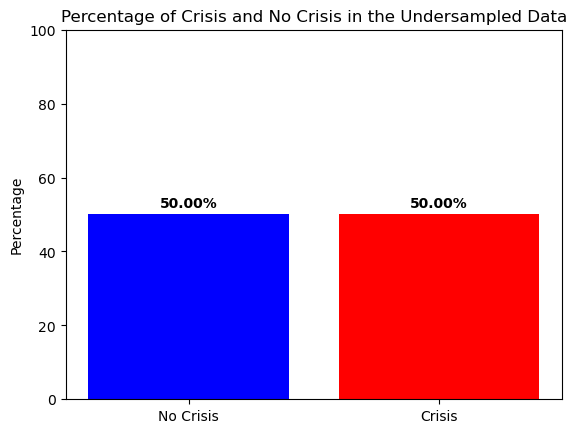

In [42]:
count_no_crisis = len(y_train_resampled[y_train_resampled == 'no_crisis'])
count_crisis = len(y_train_resampled[y_train_resampled == 'crisis'])

pct_of_no_crisis = count_no_crisis / (count_no_crisis + count_crisis) * 100
pct_of_crisis = count_crisis / (count_no_crisis + count_crisis) * 100

labels = ['No Crisis', 'Crisis']
percentages = [pct_of_no_crisis, pct_of_crisis]

plt.bar(labels, percentages, color=['blue', 'red'])
plt.ylabel('Percentage')
plt.title('Percentage of Crisis and No Crisis in the Undersampled Data')
plt.ylim(0, 100)

for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.savefig('graphee2e.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9779874213836478
Confusion Matrix:
[[281   4]
 [  3  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.88      0.91      0.90        33

    accuracy                           0.98       318
   macro avg       0.94      0.95      0.94       318
weighted avg       0.98      0.98      0.98       318



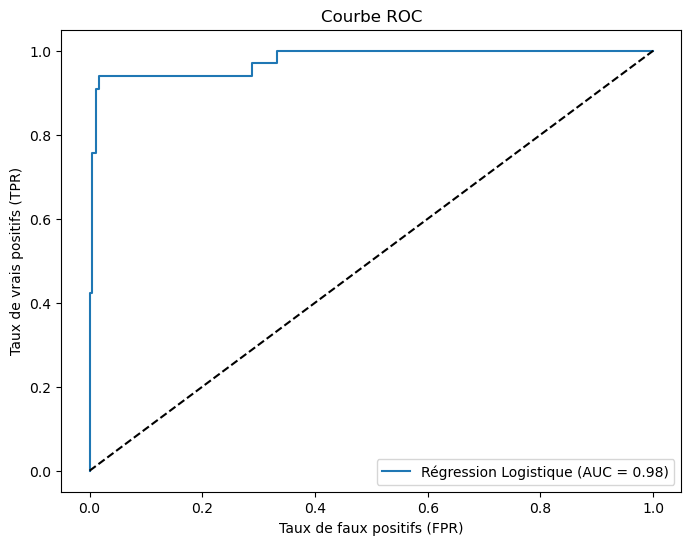

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test data
Y_pred = logreg.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)

Y_probs = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Régression Logistique (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8270440251572327
Confusion Matrix:
[[239  46]
 [  9  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       285
           1       0.34      0.73      0.47        33

    accuracy                           0.83       318
   macro avg       0.65      0.78      0.68       318
weighted avg       0.90      0.83      0.85       318



C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


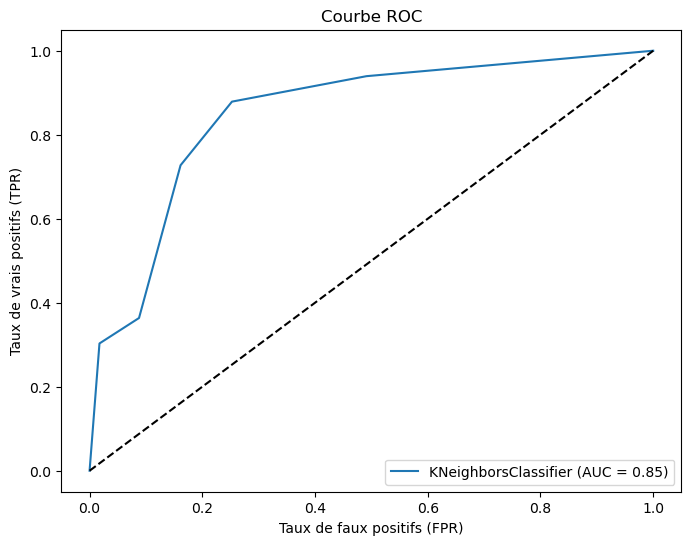

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
knn.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)


Y_probs = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNeighborsClassifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8647798742138365
Confusion Matrix:
[[260  25]
 [ 18  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       285
           1       0.38      0.45      0.41        33

    accuracy                           0.86       318
   macro avg       0.66      0.68      0.67       318
weighted avg       0.88      0.86      0.87       318



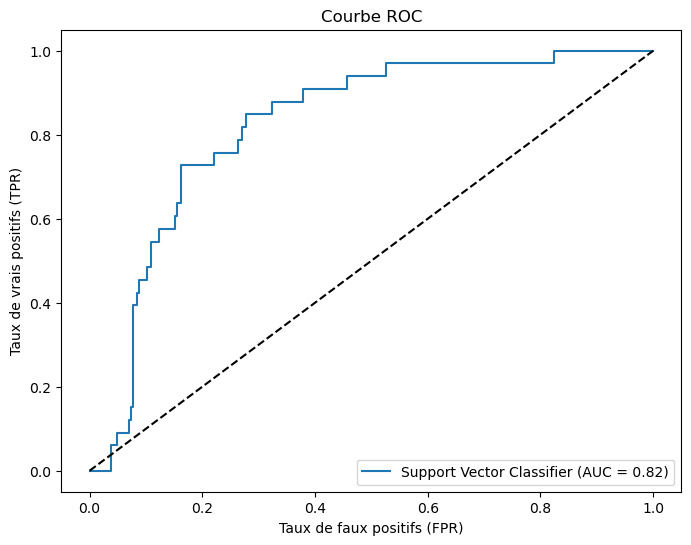

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of SVC (Support Vector Classifier)
svm = SVC(probability=True)

# Fit the SVM model to the training data
svm.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test data
Y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)

Y_probs = svm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()